In [1]:
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import corner

In [2]:
###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.1
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['axes.labelpad'] = 8
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
mpl.rcParams['figure.figsize'] = 28,20

# Save details
mpl.rcParams['savefig.bbox'] = 'standard'
mpl.rcParams['savefig.pad_inches'] = 0.1


mpl.rcParams['axes.labelsize'] = 'xx-large'
mpl.rcParams["font.size"] = 12


mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'

mpl.rcParams['axes.labelpad'] = 20

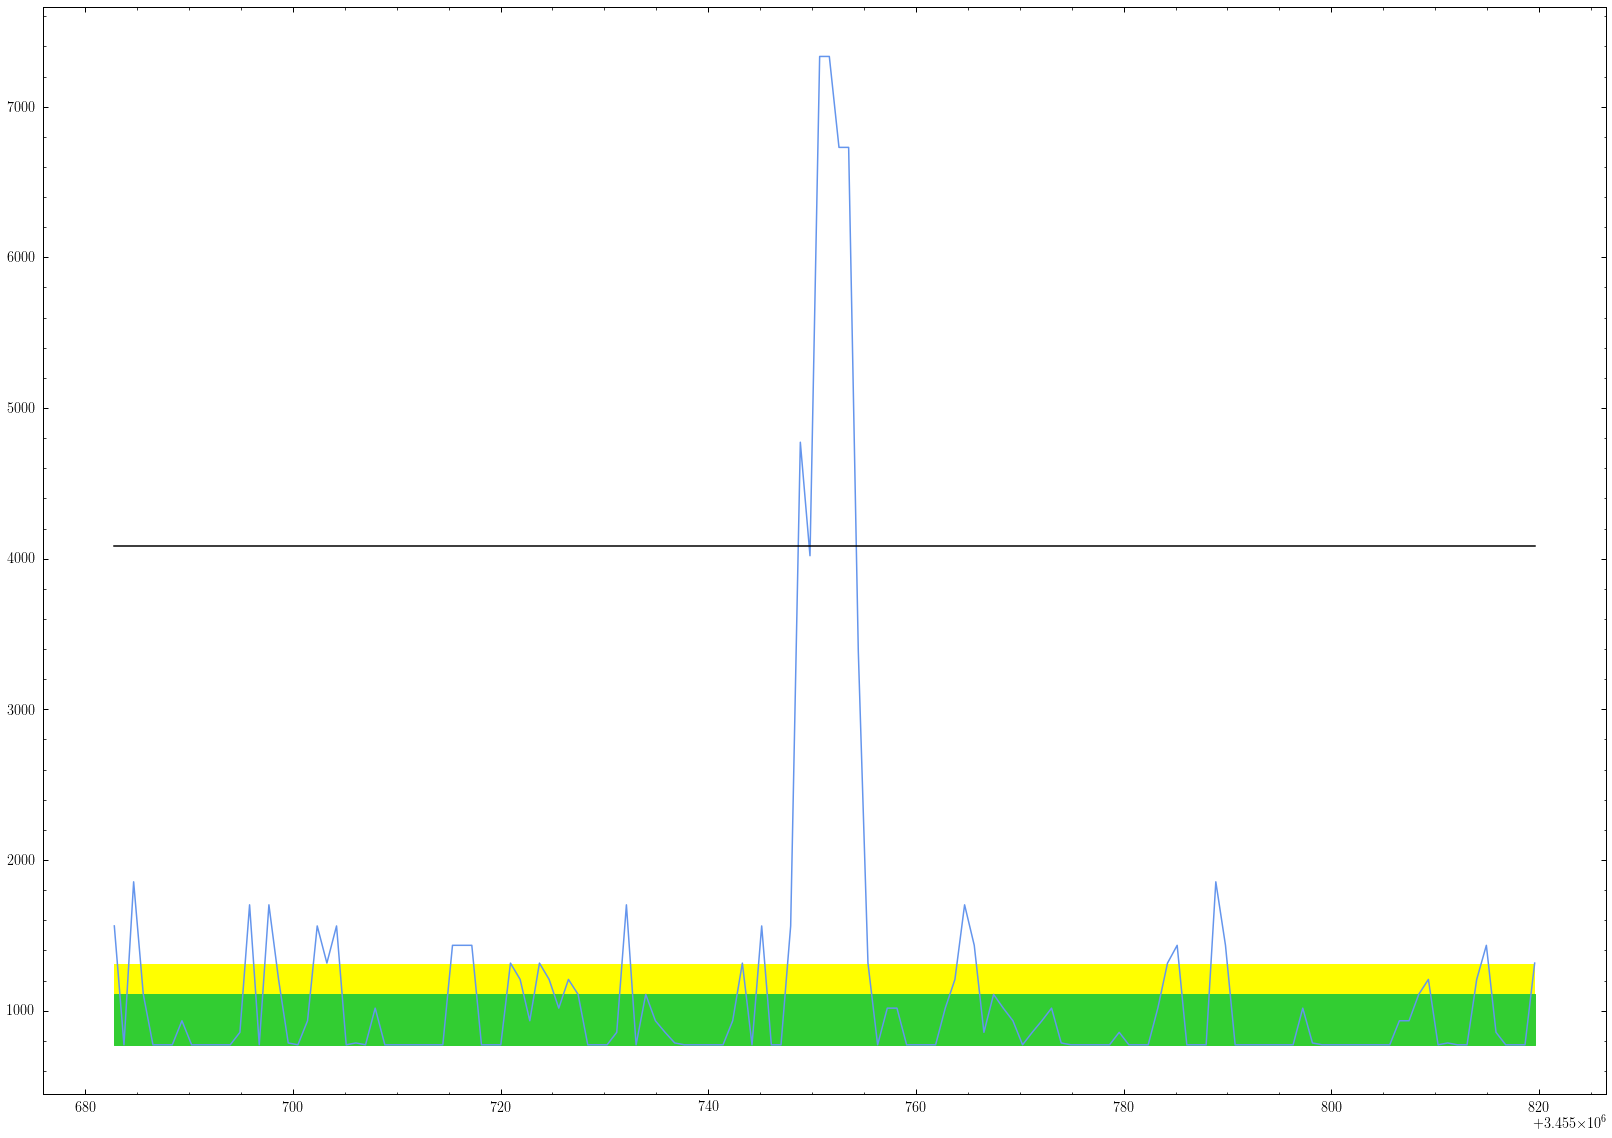

In [15]:
mass_set = np.load('/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Data/Mass_TestSet.npy')
A_Limits = np.load('/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Data/A_Limits.npy')
Detection_Threshold = np.load('/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Data/Detection_Threshold.npy')
Sigma_A = np.load('/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Data/Sigma_A.npy')

A_Limits = np.maximum(A_Limits, 1.0713*Sigma_A)

plt.plot(mass_set, A_Limits, c = 'C0')
plt.plot(mass_set, Detection_Threshold, c = 'black')

plt.fill_between(mass_set, 1.0713*Sigma_A, 1.542*Sigma_A, color = 'limegreen', zorder = 2, label = r'Resonant $1\sigma$ Expected Constraint')

plt.fill_between(mass_set, 1.0713*Sigma_A, 1.815*Sigma_A, color = 'yellow', zorder = 1, label = r'Resonant $2\sigma$ Expected Constraint', lw = 0)
plt.show()

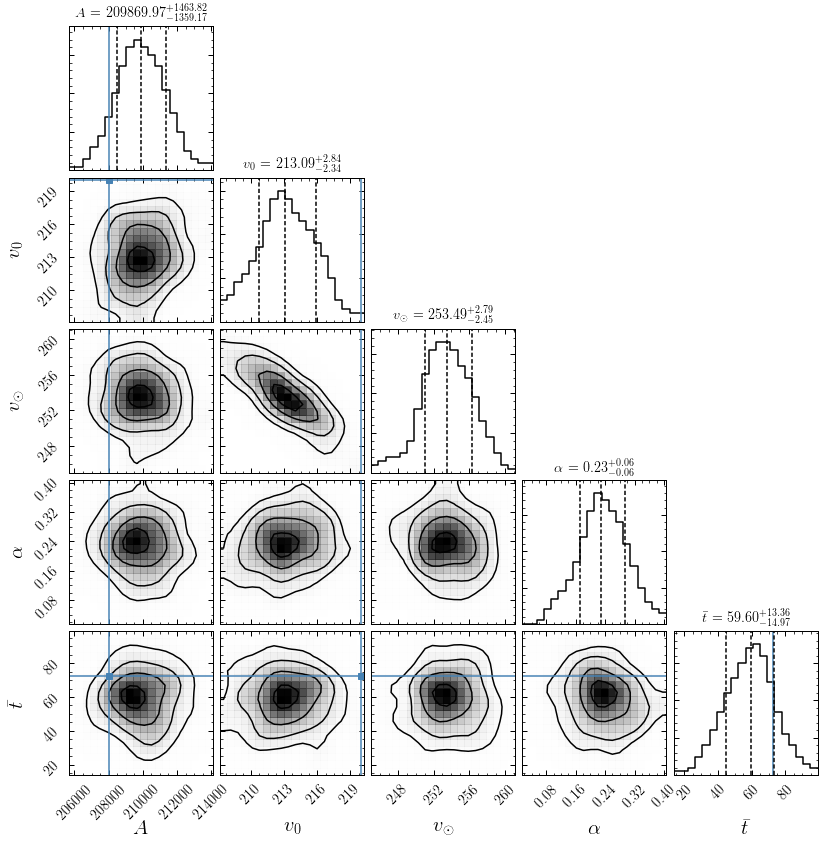

In [29]:
chain_file ='/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Data/Halo_Only_Chains/post_equal_weights.dat'
chain = np.array(np.loadtxt(chain_file))[:, [0, 2, 3, 4, 5]]

# Now make a triangle plot using corner
corner.corner(chain, smooth=1.5, 
              smooth1d=1, quantiles=[0.16, 0.5, 0.84], show_titles=True,
              title_fmt='.2f', title_args={'fontsize': 14},
              labels = ['$A$', '$v_0$', '$v_\odot$', '$\\alpha$', '$\\bar t$'],
              truths = [8000.0*26, 220, 232.36, .49, 72.4],
              range=[1 for _ in range(chain.shape[1])],
              plot_datapoints=False, verbose=False)
plt.show()

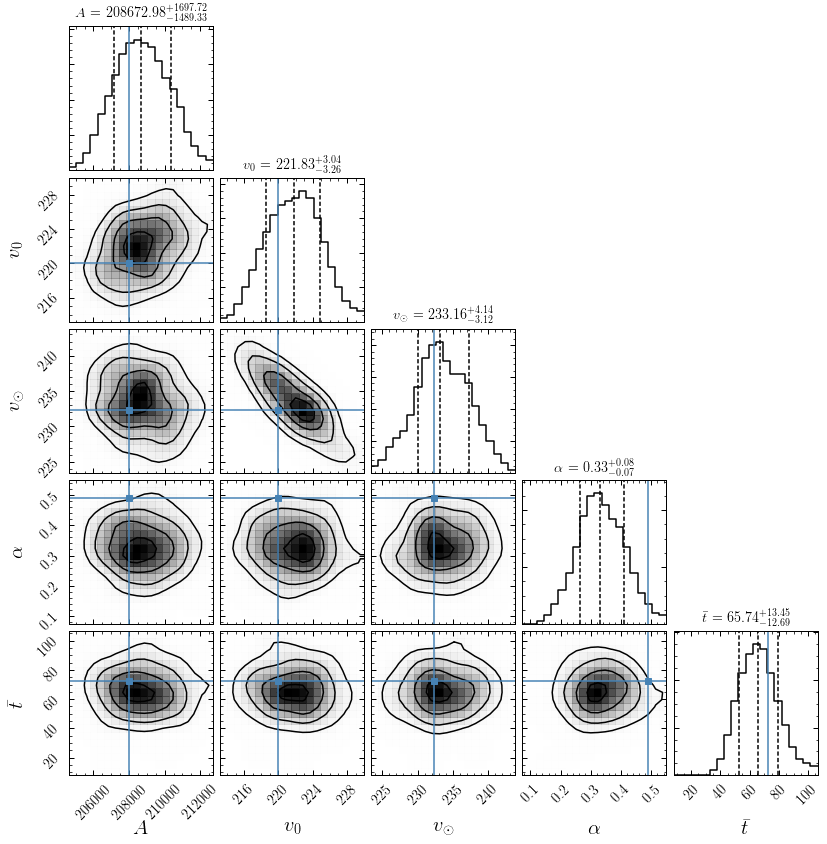

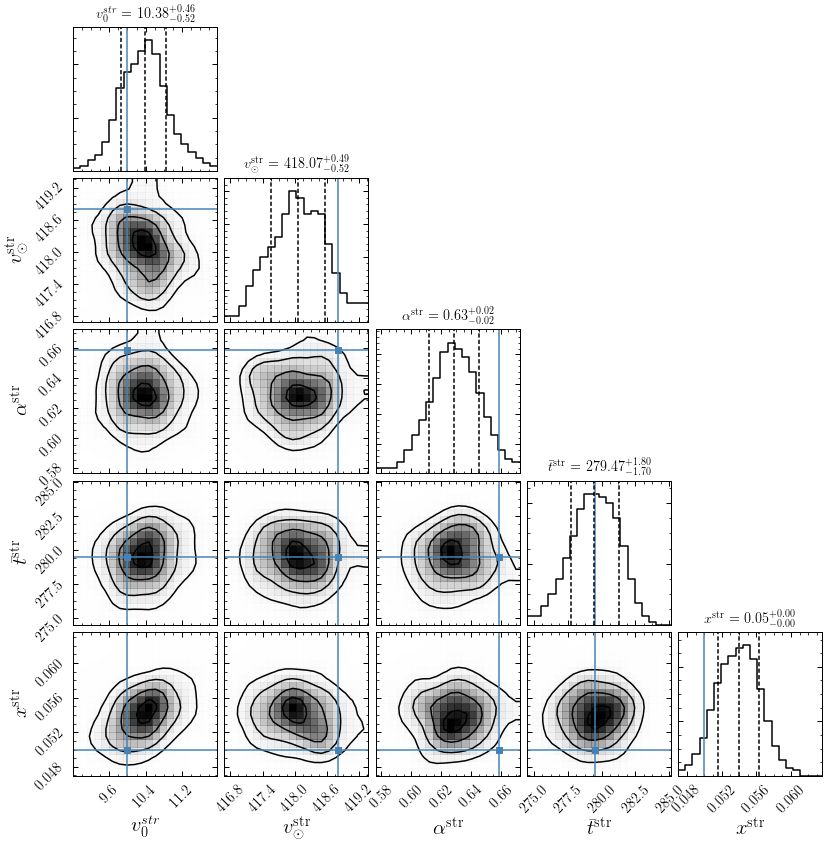

In [28]:
chain_file ='/nfs/turbo/bsafdi/fosterjw/github/ABRA-DATA/Data/Stream_Halo_Chains/post_equal_weights.dat'
halo_chain = np.array(np.loadtxt(chain_file))[:, [0, 2, 3, 4, 5]]
stream_chain = np.array(np.loadtxt(chain_file))[:, [6, 7, 8, 9, 10]]

# Now make a triangle plot using corner
corner.corner(halo_chain, smooth=1.5, 
              smooth1d=1, quantiles=[0.16, 0.5, 0.84], show_titles=True,
              title_fmt='.2f', title_args={'fontsize': 14},
              labels = ['$A$', '$v_0$', '$v_\odot$', '$\\alpha$', '$\\bar t$'],
              truths = [8000.0*26, 220, 232.36, .49, 72.4],
              range=[1 for _ in range(halo_chain.shape[1])],
              plot_datapoints=False, verbose=False)

plt.show()

# Now make a triangle plot using corner
corner.corner(stream_chain, smooth=1.5, 
              smooth1d=1, quantiles=[0.16, 0.5, 0.84], show_titles=True,
              title_fmt='.2f', title_args={'fontsize': 14},
              labels = ['$v_0^{str}$', '$v_{\odot}^{\\rm str}$', '$\\alpha^{\\rm str}$', '$\\bar t^{\\rm str}$', '$x^{\\rm str}$'],
              truths = [10.0, 418.8, .659, 279.51, .05],
              range=[1 for _ in range(stream_chain.shape[1])],
              plot_datapoints=False, verbose=False)

plt.show()